# CS4243 - Lab Session 2
Computer Vision & Pattern Recognition

Week 4

Author: Dr. Amirhassan MONAJEMI. Modified by: Weida Liang

## Welcome! 👋

This notebook contains the tutorials for the `first` and `second` lab sessions. The following materials are covered:
- Session #1: Background and Global Operations
- Session #2: Local Operations and Spatial Domain Filtering

This week focuses on the first session. We will explore the basic global operations of image processing and how to use them to alter and enhance an image.

Things to do in the following session:

# Local Operations and Spatial Domain Filtering 

### Filtering, LP, and HP
Read an image, design some filters that you can see below.
- Filter your image with those filters. Use the `cv2.filter2D` instruction.
- See the resulting image and compute its power and entropy
- Check different arguments of that filter2D function

In [11]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
#Your image path
im_file = "./CS4243_2023_images_small/01a_amusementpark.jpg"

In [12]:
def am_power(a):
    dim1 = a.shape
    
    if len(dim1)==2:
        sz = dim1[0] * dim1[1] 
    elif len(dim1)==3:
        sz = dim1[0] * dim1[1] * dim1[2]        
    pa = np.sum(a ** 2.0) / sz    
    
    return pa
def am_entropy(nimg , N=256):
    M = nimg.shape
    ssz = M[0] * M[1]
    hist,bins = np.histogram(nimg.flatten(),N,[0,N])
    hist = hist / ssz
    ent = -np.sum( hist * np.log2(hist+0.000001))
    return ent

You should try to define 2-3 low pass filter and 2-3 high pass filter. And then apply to your image.

In [13]:
gle = cv2.imread(im_file, 0)

lp1 = np.array([[0.11, 0.11, 0.11],[0.11, 0.11, 0.11], [0.11, 0.11, 0.11]]) #1/9 lp filter
lp2 = np.array([[0.25, 0.25], [0.25, 0.25]])
lp3 = np.array([[0, 0.125, 0], [0.125, 0.5, 0.125], [0, 0.125, 0]])

hp1 = np.array([[1, -1], [-1, 1]])
hp2 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
hp3 = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]]) #Laplacian

(<Axes: title={'center': 'Original Image'}>,
 Text(0.5, 1.0, 'Original Image'),
 (-0.5, 2955.5, 1895.5, -0.5))

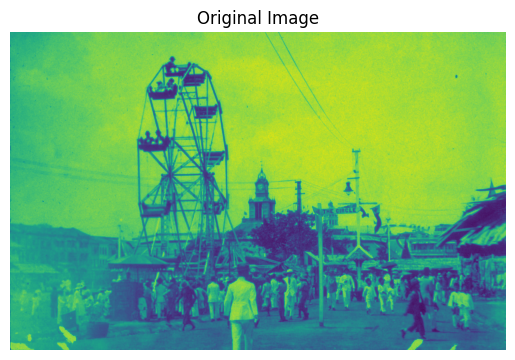

In [14]:
kernels = [lp1, lp2, lp3, hp1, hp2, hp3]
k_name = ['low pass 1', 'low pass 2','low pass 3','high pass 1', 'high pass 2', 'high pass 3' ]
plt.subplot(111), plt.imshow(gle), plt.title('Original Image'), plt.axis('off')

(<Axes: title={'center': 'High Pass 3'}>,
 Text(0.5, 1.0, 'High Pass 3'),
 (-0.5, 2955.5, 1895.5, -0.5))

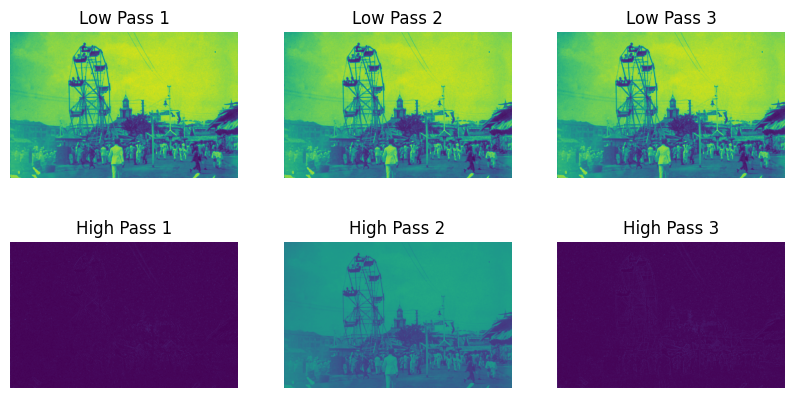

In [15]:
# filtering
plt.figure(figsize=(10, 5))
imgs=[]
for i in range(len(k_name)):
    imgs.append(cv2.filter2D(src=gle, ddepth=-1, kernel=kernels[i]))
plt.subplot(231), plt.imshow(imgs[0]), plt.title('Low Pass 1'), plt.axis('off') 
plt.subplot(232), plt.imshow(imgs[1]), plt.title('Low Pass 2') , plt.axis('off')
plt.subplot(233), plt.imshow(imgs[2]), plt.title('Low Pass 3'), plt.axis('off')
plt.subplot(234), plt.imshow(imgs[3]), plt.title('High Pass 1'), plt.axis('off')
plt.subplot(235), plt.imshow(imgs[4]), plt.title('High Pass 2'), plt.axis('off')
plt.subplot(236), plt.imshow(imgs[5]), plt.title('High Pass 3'), plt.axis('off')

In [16]:
# Computing Power and Entropy
for i in range(len(k_name)):
    b = cv2.filter2D(src=gle, ddepth=-1, kernel=kernels[i])
    print('Image Power after applying filter %s= %9.3f' %(k_name[i] , am_power(b) ) )
    print('Image Entropy after applying filter %s= %9.3f' %(k_name[i] , am_entropy(b) ))

Image Power after applying filter low pass 1= 13996.004
Image Entropy after applying filter low pass 1=     6.438
Image Power after applying filter low pass 2= 14284.977
Image Entropy after applying filter low pass 2=     6.415
Image Power after applying filter low pass 3= 14282.818
Image Entropy after applying filter low pass 3=     6.460
Image Power after applying filter high pass 1=     0.735
Image Entropy after applying filter high pass 1=     1.215
Image Power after applying filter high pass 2= 14430.046
Image Entropy after applying filter high pass 2=     6.852
Image Power after applying filter high pass 3=     6.319
Image Entropy after applying filter high pass 3=     2.159


### Sobel Operator
Develop a Sobel edge detection program and test it on images below.

- In this section, you should define the sobel kernel to extract vertical and horizontal features.
- Set a threshold to extract clearer feature
- After you obtain the x and y axis features, try to combine them together

In [17]:
y_sobel_kernel = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])
x_sobel_kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

In [18]:
Y_feature = cv2.filter2D(src=gle, ddepth=-1, kernel=y_sobel_kernel)
X_feature = cv2.filter2D(src=gle, ddepth=-1, kernel=x_sobel_kernel)

(<Axes: >,
 (-0.5, 2955.5, 1895.5, -0.5))

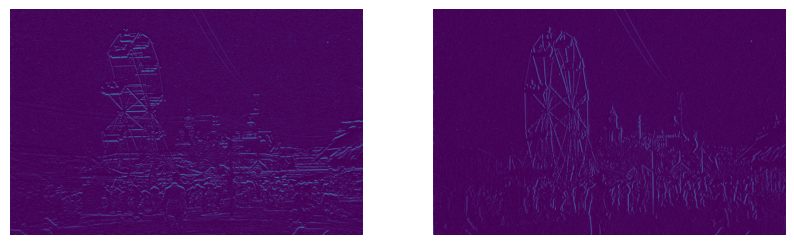

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(Y_feature), plt.axis('off') 
plt.subplot(122), plt.imshow(X_feature) , plt.axis('off')

In [20]:
# Set a threshold to extract clearer feature
thr = 0.2
thr_Y = Y_feature.max() * thr
mask_Y = Y_feature > thr_Y
thr_X = X_feature.max() * thr
mask_X = X_feature > thr_X



(<Axes: >,
 (-0.5, 2955.5, 1895.5, -0.5))

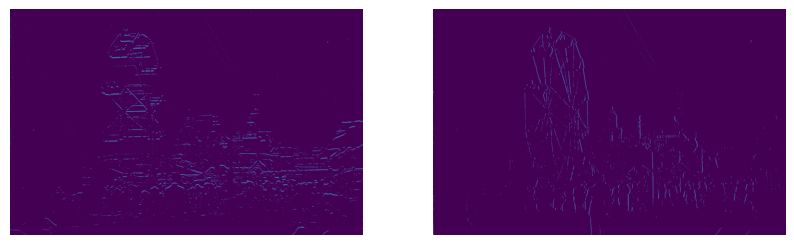

In [21]:
Y_feature_thr= Y_feature * mask_Y
X_feature_thr= X_feature * mask_X
plt.figure(figsize=(10, 5))
plt.subplot(121), plt.imshow(Y_feature_thr), plt.axis('off') 
plt.subplot(122), plt.imshow(X_feature_thr), plt.axis('off') 

How can we get the unified version (vertical and horizontal feature in one image)?

(<Axes: >,
 (-0.5, 2955.5, 1895.5, -0.5))

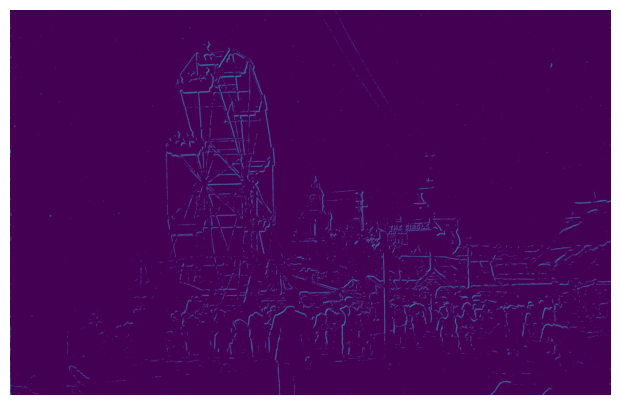

In [22]:
unified_feature=(Y_feature_thr+X_feature_thr)/2
plt.figure(figsize=(10, 5))
plt.subplot(111), plt.imshow(unified_feature), plt.axis('off') 


### Gaussian

Define your gaussian kernel and apply to the image. Note that you should define gaussian kernel by yourself instead of using existing package.
2D Gaussian equation:




$$
G(x, y) = \frac{1}{2\pi\sigma^2} e^{-\frac{x^2 + y^2}{2\sigma^2}}
$$

In [23]:
def gaussian_kernel(size, sigma=1.0):
    """Generate a Gaussian kernel of given size and standard deviation."""
    # Initialize an empty size x size array
    kernel = np.zeros((size, size))
    
    # Calculate the center position of the kernel
    center = size // 2
    
    # Loop through each element in the size x size array
    for x in range(0, size):
        for y in range(0, size):
            coefficient =  (1 / (2 * np.pi * (sigma ** 2))) * np.exp (- (((x - center) ** 2) + ((y - center) ** 2)) / (2 *(sigma ** 2)))
            kernel[x][y] = coefficient
    # Normalize the kernel by dividing each element by the sum of all elements
    kernel = kernel / np.sum(kernel)
    return kernel

(<Axes: >,
 (-0.5, 2955.5, 1895.5, -0.5))

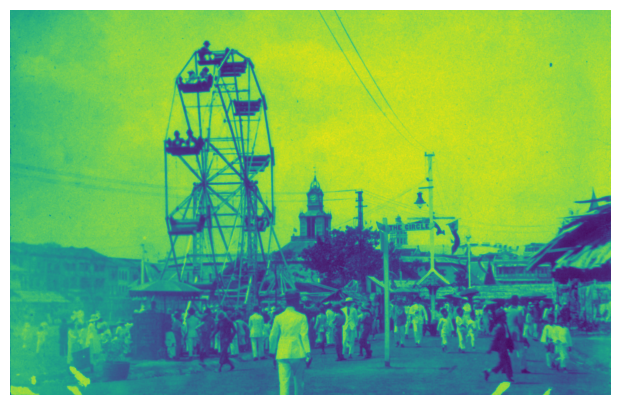

In [24]:
kernel = gaussian_kernel(size = 5, sigma = 1.0)
output = cv2.filter2D(gle, ddepth = -1, kernel = kernel)
plt.figure(figsize=(10, 5))
plt.subplot(111), plt.imshow(output), plt.axis('off')

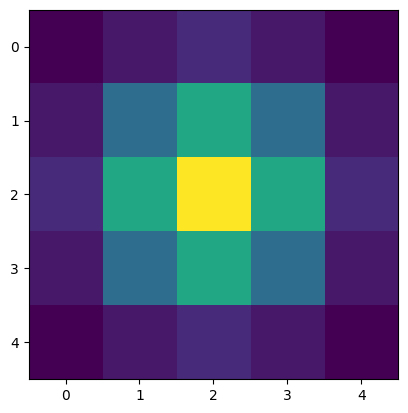

In [25]:
kernel = gaussian_kernel(size = 5)
plt.imshow(kernel)

### Unsharp Masking
Implement unsharp masking by following instruction

(<Axes: >,
 (-0.5, 2955.5, 1895.5, -0.5))

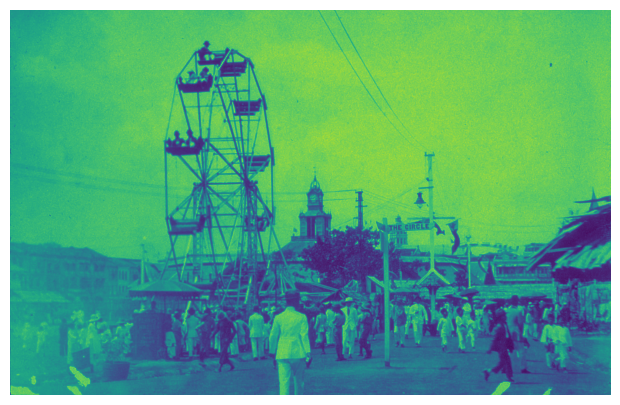

In [26]:
# Step 1: Create a blurred version of the image using Gaussian blur
blurredImage = cv2.GaussianBlur(gle, (21, 21), 0, 0)

# Step 2: Subtract the blurred image from the original to create the mask
subtractedImage = cv2.subtract(gle, blurredImage)

# Step 3: Add the mask back to the original image
sharpenedImage = cv2.add(subtractedImage, gle)

plt.figure(figsize = (10, 5))
plt.subplot(111), plt.imshow(sharpenedImage), plt.axis('off') 

(<Axes: title={'center': 'Original Image'}>,
 Text(0.5, 1.0, 'Original Image'),
 (-0.5, 2955.5, 1895.5, -0.5))

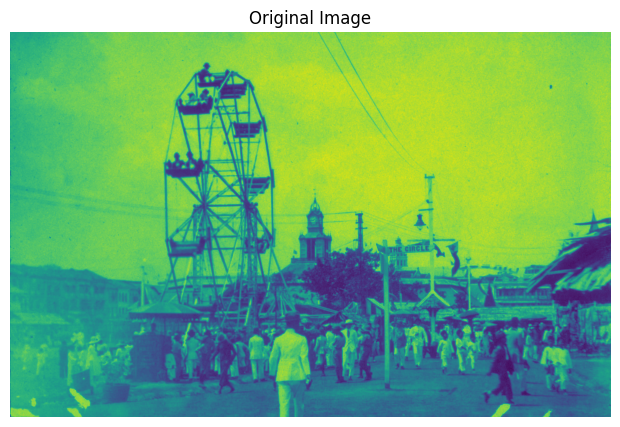

In [31]:
# Original image plot
ogImage = cv2.imread(im_file, 0)
plt.figure(figsize = (10, 5))
plt.subplot(111), plt.imshow(gle), plt.title('Original Image'), plt.axis('off')